In [1]:
%matplotlib inline
from __future__ import print_function, division
from keras.models import model_from_json, Model
import json
import matplotlib.pyplot as plt
import numpy as np
import sys; sys.path.append('..')
import os
import keras.backend as K
from deepcalcium.datasets.nf import nf_load_hdf5

os.environ['CUDA_VISIBLE_DEVICES'] = ""
print('Done')

Using TensorFlow backend.
/raid/alex-scratch/pyenvs/deep-calcium/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


Couldn't import dot_parser, loading of dot files will not be possible.
Done


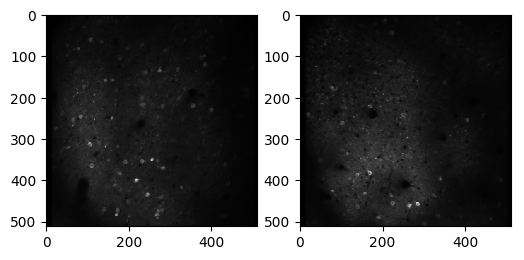

In [2]:
# Load a couple datasets.
datasets = nf_load_hdf5(['neurofinder.00.03', 'neurofinder.00.08'])
S_summs = [d.get('series/mean')[...].astype(np.float32) for d in datasets]
M_summs = [d.get('masks/max')[...].astype(np.float32) for d in datasets]
fig, _ = plt.subplots(1, 2)
fig.axes[0].imshow(S_summs[0], cmap='gray')
fig.axes[1].imshow(S_summs[1], cmap='gray')
plt.show()

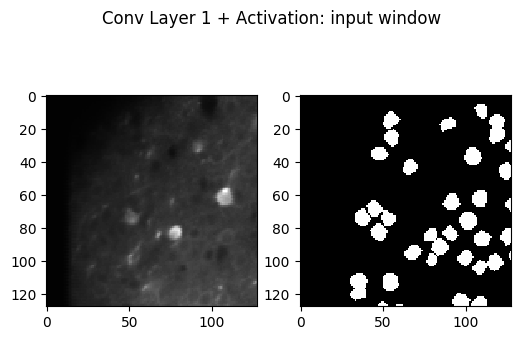

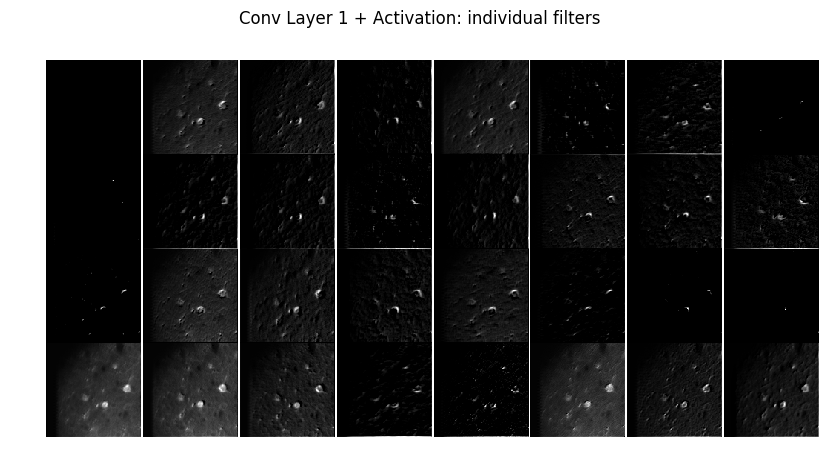

**********


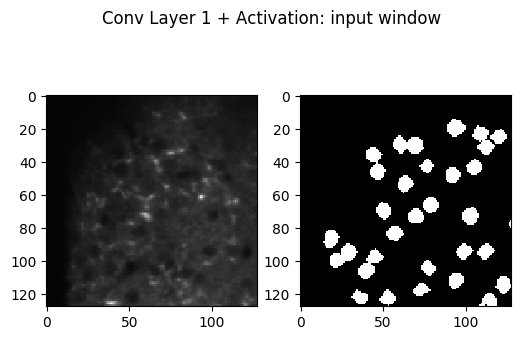

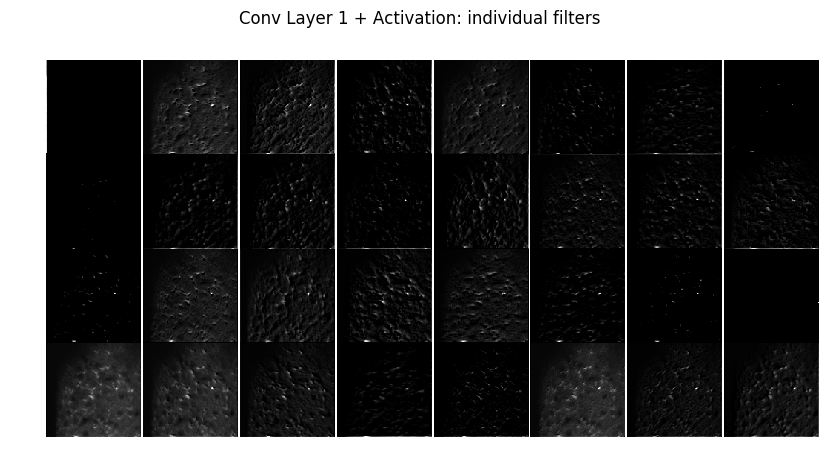

**********


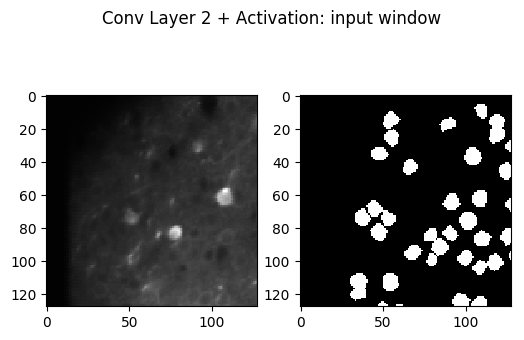

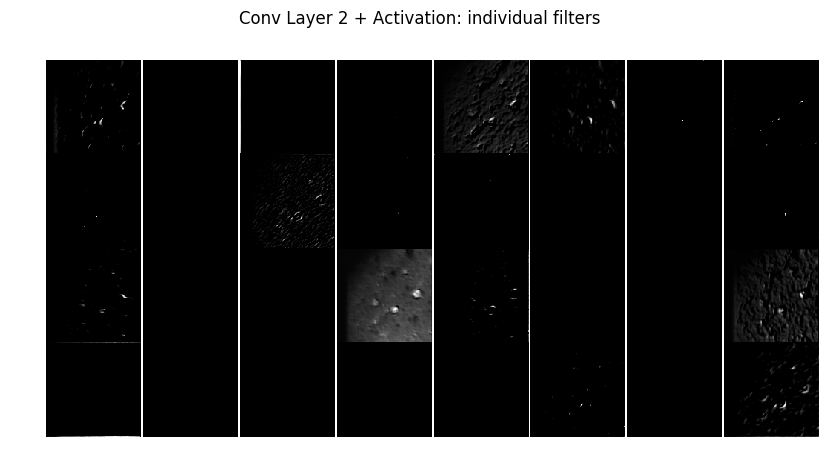

**********


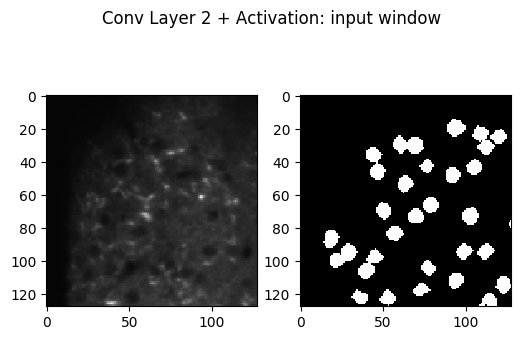

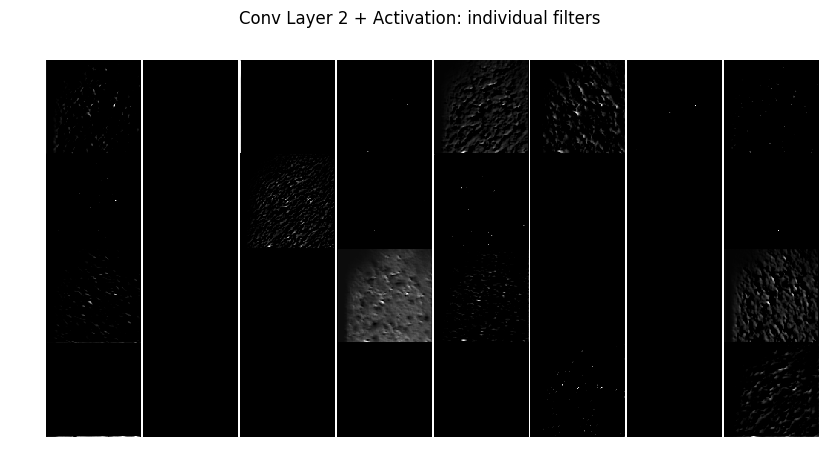

**********


In [3]:
# Show activations at first and second layer of network, including the ReLU activations.
net = model_from_json(json.load(open('../checkpoints/unet2ds_128x128_nf/model.json')))
net.load_weights('../checkpoints/unet_2d_summary_128x128_nf_0.53556/weights_val_nf_f1_mean.hdf5')
shp = net.input_shape

conv1 = Model(inputs=net.input, outputs=net.layers[3].output)
conv2 = Model(inputs=net.input, outputs=net.layers[4].output)

def plot_activations(net, title):
    for s, m in zip(S_summs, M_summs):
        swdw = s[:shp[1],:shp[2]]
        mwdw = m[:shp[1],:shp[2]]
        filtered = net.predict(swdw[np.newaxis, :, :])[0].transpose(2,0,1)
        
        fig, _ = plt.subplots(1, 2)
        fig.axes[0].imshow(swdw, cmap='gray')
        fig.axes[1].imshow(mwdw, cmap='gray')
        plt.suptitle('%s: input window' % title)
        plt.show()
        
        fig, _ = plt.subplots(4, 8, figsize=(10, 5))
        for f, ax in zip(filtered, fig.axes):
            ax.imshow(f, cmap='gray')
            ax.axis('off')
        plt.suptitle('%s: individual filters' % title)
        plt.subplots_adjust(left=None, wspace=0, hspace=0, right=None)
        plt.show()
        print('*' * 10)

plot_activations(conv1, 'Conv Layer 1 + Activation')
plot_activations(conv2, 'Conv Layer 2 + Activation')